In [15]:
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_w=pd.read_csv('Data\weekly_features.csv')
df_m=pd.read_csv('Data\monthly features.csv')

<AxesSubplot:>

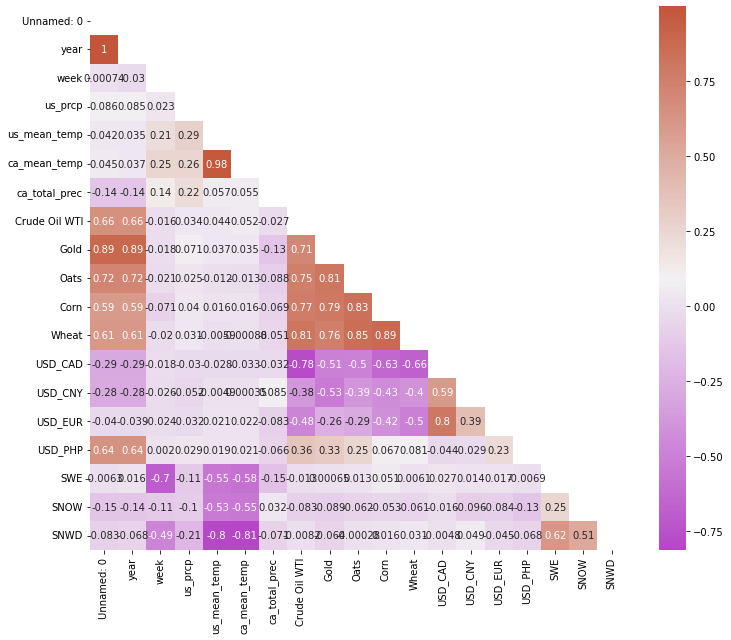

In [16]:
corr = df_w.corr()
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(300, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [17]:
corr

,Unnamed: 0,year,week,us_prcp,us_mean_temp,ca_mean_temp,ca_total_prec,Crude Oil WTI,Gold,Oats,Corn,Wheat,USD_CAD,USD_CNY,USD_EUR,USD_PHP,SWE,SNOW,SNWD
Unnamed: 0,1.000000,0.999526,0.000742,0.086003,0.041731,0.044851,-0.135562,0.656043,0.889886,0.717574,0.592666,0.608100,-0.291176,-0.284728,-0.040159,0.641913,-0.006288,-0.146369,-0.083293
year,0.999526,1.000000,-0.030045,0.085250,0.035111,0.036859,-0.139886,0.655900,0.889827,0.717737,0.594477,0.608294,-0.290339,-0.283679,-0.039401,0.640796,0.016188,-0.142768,-0.068316
week,0.000742,-0.030045,1.000000,0.023150,0.207589,0.250095,0.135700,-0.015696,-0.017533,-0.021131,-0.070807,-0.020142,-0.017579,-0.026150,-0.024409,0.002001,-0.697411,-0.114782,-0.486610
us_prcp,0.086003,0.085250,0.023150,1.000000,0.286190,0.262125,0.218488,0.034408,0.070761,0.025325,0.040349,0.030891,-0.029524,-0.051971,-0.031565,0.029152,-0.111744,-0.101361,-0.214972
us_mean_temp,0.041731,0.035111,0.207589,0.286190,1.000000,0.975984,0.056691,0.043805,0.036799,-0.011635,0.015847,-0.005853,-0.028024,-0.004950,0.021439,0.019160,-0.552622,-0.534503,-0.799228
ca_mean_temp,0.044851,0.036859,0.250095,0.262125,0.975984,1.000000,0.054872,0.052408,0.035324,-0.012995,0.016111,-0.000875,-0.033079,-0.000345,0.022122,0.021108,-0.583664,-0.546808,-0.812388
ca_total_prec,-0.135562,-0.139886,0.135700,0.218488,0.056691,0.054872,1.000000,-0.026591,-0.134264,-0.087766,-0.068509,-0.050742,-0.032266,0.085259,-0.082824,-0.065931,-0.154457,0.031608,-0.071092
Crude Oil WTI,0.656043,0.655900,-0.015696,0.034408,0.043805,0.052408,-0.026591,1.000000,0.708265,0.752957,0.766757,0.812943,-0.778387,-0.382715,-0.480715,0.361231,-0.013388,-0.082686,-0.008156
Gold,0.889886,0.889827,-0.017533,0.070761,0.036799,0.035324,-0.134264,0.708265,1.000000,0.806366,0.787429,0.757109,-0.507244,-0.532973,-0.259087,0.325148,0.000652,-0.088545,-0.064321
Oats,0.717574,0.717737,-0.021131,0.025325,-0.011635,-0.012995,-0.087766,0.752957,0.806366,1.000000,0.829686,0.852074,-0.496148,-0.392379,-0.287505,0.250070,0.013119,-0.062261,-0.000284


In [22]:
dates = df.year*100+df.week
df['Date'] = pd.to_datetime(dates.astype(str) + '0', format='%Y%W%w')

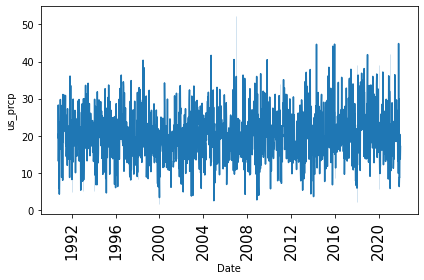

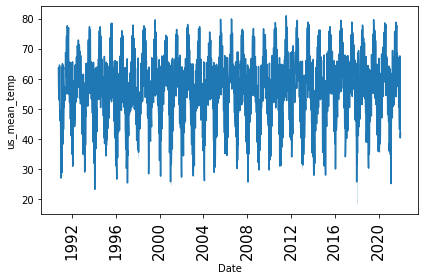

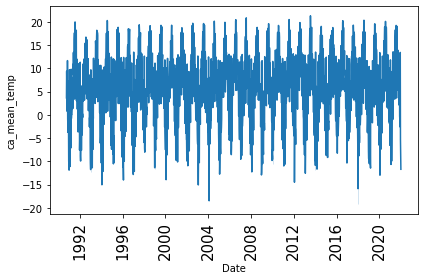

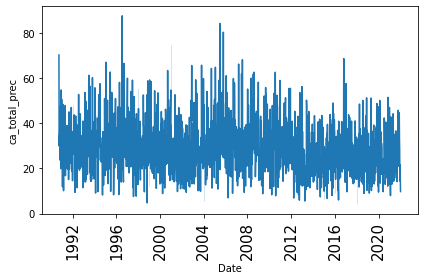

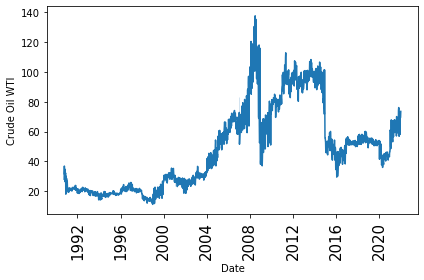

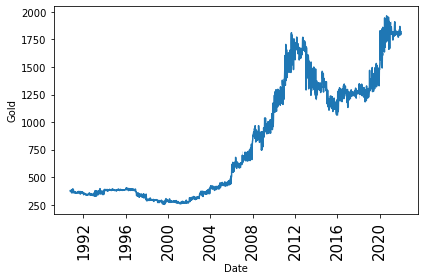

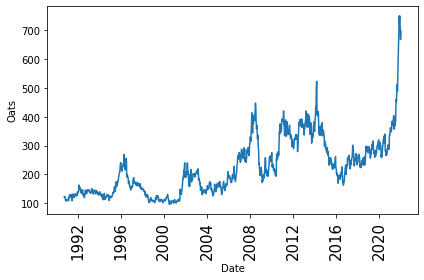

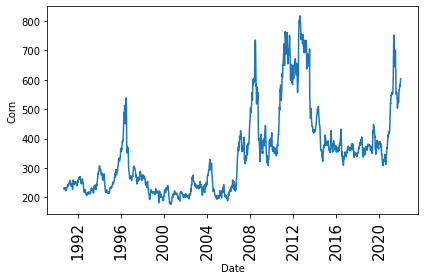

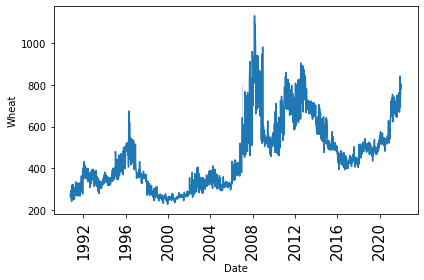

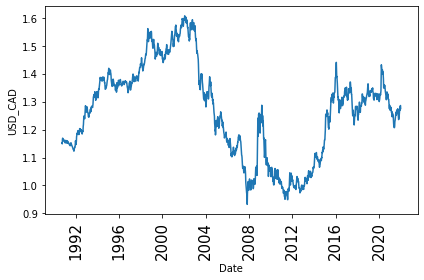

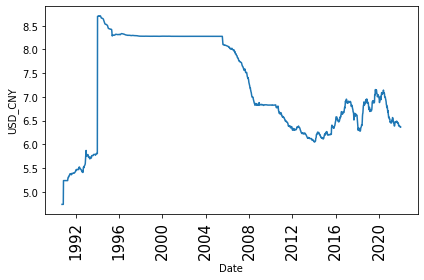

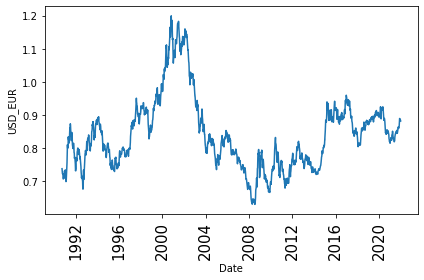

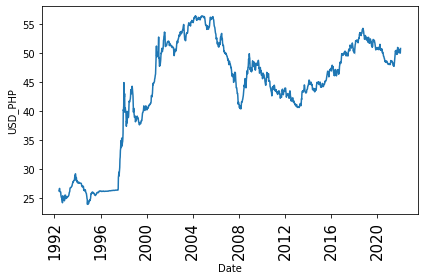

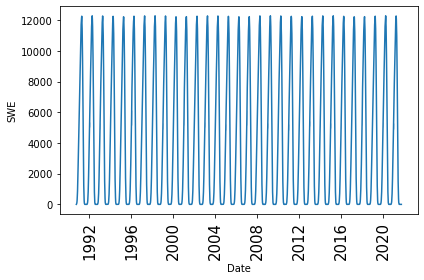

In [29]:
for col_name in df.columns.values[2:16]:
    X = df.Date
    Y = df[col_name]
    # Set figure

    #plt.figure(figsize=(12,10))

    # Seaborn

    sns.lineplot(x=X, y=Y)

    # Setting Ticks

    plt.tick_params(axis='x',labelsize=15,rotation=90)
    plt.tight_layout()

    # Display

    plt.show()